In [1]:
import tensorflow as tf
import numpy as np
from utils_models.cnn import *
from utils_models.mixed_classifier import *
from utils_models.rnn import *
from utils_models.sketch_rnn import *
from utils_models.utils import *
from preprocess import *
from test import *
from train_cnn import *
from train_rnn import *
from train_mix_model import *
%load_ext autoreload
%autoreload 2

# Data Transformation and Load

original data {'word': 'cat', 'countrycode': 'BR', 'timestamp': '2017-03-26 18:43:54.78083 UTC', 'recognized': True, 'key_id': '4647694628814848', 'drawing': [[[222, 196, 176, 173, 179, 191, 233, 251, 255, 250, 231, 219], [31, 32, 43, 60, 72, 79, 79, 69, 54, 35, 27, 27]], [[176, 198, 203], [42, 0, 26]], [[219, 238, 249, 252, 252], [29, 11, 5, 16, 43]], [[190, 188, 191, 200, 204, 200], [44, 45, 49, 51, 43, 41]], [[233, 228, 233, 241, 243, 231], [44, 48, 53, 53, 46, 43]], [[203, 208, 213, 218, 227, 234], [63, 69, 69, 62, 70, 62]], [[168, 101, 75, 54, 53, 59, 69, 132, 180, 195, 199, 197], [41, 50, 62, 81, 101, 108, 110, 108, 83, 67, 61, 60]], [[57, 16, 0, 3, 23, 28, 40, 56], [76, 101, 130, 138, 137, 100, 90, 87]], [[74, 75, 78, 85, 94, 97, 96], [106, 139, 143, 145, 145, 140, 106]], [[163, 170, 172, 177, 183, 183, 176, 175], [92, 132, 134, 132, 122, 104, 93, 82]]]}


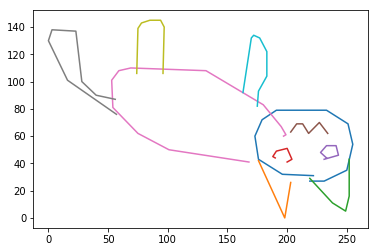

transformed data [[   0    0    1    0    0]
 [ -26    1    1    0    0]
 [ -20   11    1    0    0]
 [  -3   17    1    0    0]
 [   6   12    1    0    0]
 [  12    7    1    0    0]
 [  42    0    1    0    0]
 [  18  -10    1    0    0]
 [   4  -15    1    0    0]
 [  -5  -19    1    0    0]
 [ -19   -8    1    0    0]
 [ -12    0    0    1    0]
 [ -43   15    1    0    0]
 [  22  -42    1    0    0]
 [   5   26    0    1    0]
 [  16    3    1    0    0]
 [  19  -18    1    0    0]
 [  11   -6    1    0    0]
 [   3   11    1    0    0]
 [   0   27    0    1    0]
 [ -62    1    1    0    0]
 [  -2    1    1    0    0]
 [   3    4    1    0    0]
 [   9    2    1    0    0]
 [   4   -8    1    0    0]
 [  -4   -2    0    1    0]
 [  33    3    1    0    0]
 [  -5    4    1    0    0]
 [   5    5    1    0    0]
 [   8    0    1    0    0]
 [   2   -7    1    0    0]
 [ -12   -3    0    1    0]
 [ -28   20    1    0    0]
 [   5    6    1    0    0]
 [   5    0    1    0    0]
 [ 

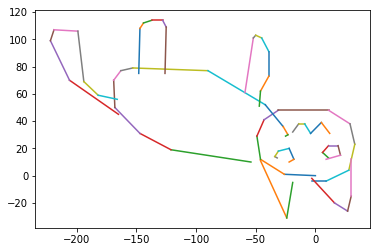

In [6]:
# The data used is the simplified njson file
file_path = "./data/simplified"
save_path = "./data/transformed"

# One example, any category can be put into the list
categories = ["cat"]

transformed = transform_to_sketch(file_path, categories)
# Use save if needed
# save_transformed(transformed, save_path)

trans = load_one_transformed(save_path + "/" + "cat.npy")

contents = check_and_load(file_path, categories)
for i in range(1,2):
    print("original data", contents[0][i])
    visualize_one_picture(contents[0][i]["drawing"])
    print("transformed data", trans[i])
    visualize_one_transformed(trans[i])
    
# The data can also be transformed into PNG files, but its too time consuming
# transform_to_png(file_path, categories, "./data/png")

<font color='red' size=6>
    All models are trained for one batch here to show it's runable. 
    
   Then it's interrupted.
</font>

# Train Mixed Model

In [7]:
# Data savin path
train_class_file = "./data/training.tfrecord.classes"
train_data_file = "./data/training/training.tfrecord"
eval_data_file = "./data/eval/eval.tfrecord"

In [8]:
# This is the same function used in the python file
def run_mixed_model(num_classes):
    params = tf.contrib.training.HParams(
        batch_size=80, num_class=num_classes,
        lr=0.0001, optimizer='Adam',
        num_r_l=3, num_r_n=128, rnn_node='lstm', dr_rnn=0.2,
        num_c_l=(48, 64, 96), ker_cnn=(5, 5, 3), str_cnn=(1, 1, 1),
        bn_cnn=True, dr_cnn=0.3
    )

    model_dir = "model/mixed_model/test_tmp"
    train_dir = "data/training/training.tfrecord-?????-of-?????"
    eval_dir = "data/eval/eval.tfrecord-?????-of-?????"

    config = tf.estimator.RunConfig(model_dir=model_dir,
                                    save_checkpoints_secs=300,
                                    save_summary_steps=100)

    max_steps = 100000
    est, tr_, ev_ = get_specs(params, config, train_dir, eval_dir, max_steps)
    tf.estimator.train_and_evaluate(est, tr_, ev_)
    
# The get_num_classes funtion is defined in train_mix_model.py
classes, num_classes = get_num_classes()
with tf.device('/GPU:0'):
    run_mixed_model(num_classes)

INFO:tensorflow:Using config: {'_model_dir': 'model/mixed_model/test_tmp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 300, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025E813BF6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate

KeyboardInterrupt: 

# Train CNN Model

In [5]:
# all bitmap data saved in this directory
file_path = "./data/png"
diff_categories = ["cat", "angel", "bench", "dragon", "eyeglasses", "ice cream", "t-shirt", "steak"]
sim_categories = ["bear", "bird", "cat", "duck", "giraffe", "monkey", "panda", "penguin"]

# Chose one category here
cate_type = "diff"

if cate_type == "diff":
    categories = diff_categories
elif cate_type == "sim":
    categories = sim_categories
else:
    raise ValueError("Invalid Data Type")

cate_dict = {c: i for i, c in enumerate(categories)}
cate_dict_rev = {i: c for i, c in enumerate(categories)}
png_data = load_png_py(file_path, categories, cate_dict)

# Functions defined in train_cnn.py
cnn_type = "res18"
model_save_path = "./model/cnn_classifier_tmp/{}/{}".format(cate_type, cnn_type)
with tf.device('/GPU:0'):
    train_cnn(png_data, cnn_type, model_save_path)

Now at iteration 0, valid loss is 36179.640625, valid accuracy is 0.140625


KeyboardInterrupt: 

<font color="red">
    All RNN training functions defined in train_rnn.py. All parameters can be tuned in train_rnn.py. All models are in untils_models.rnn.

# Train RNN Classifier

<font color="red">please built the directories first following the path in the training functions

In [11]:
data_path = "./data/simplified"
data_save_path = "./data/transformed"

# please built the directories first following the path in the training functions
# This will train certain kind of dataset for different kind of cells and layer numbers. 
# The kind of dataset needs to be changed in train_rnn.py in this function.
train_encoder_model(data_path, data_save_path)

Now at iteration 0, valid loss is 2.0747251510620117, valid accuracy is 0.17578125


KeyboardInterrupt: 

# Train RNN Generator

In [12]:
train_decoder_model(data_path, data_save_path, "cat")

Now at iteration 0, valid loss is 3.551921899865925


KeyboardInterrupt: 

# Train sketch RNN

In [13]:
train_sketch_rnn(data_path, data_save_path, "diff")

Now at iteration 0, valid loss is 3.47285955136849


KeyboardInterrupt: 

# Training losses and graphes

**All losses or graphes are saved as tfevents files saved in models' directories. The name of the record directory is "log" in each models' directory. Run tensorboard to visualize it. Also, the losses and graphes are shown in the report.**

# Sampling and Prediction

INFO:tensorflow:Restoring parameters from ./model/rnn_decoder/cat/cat_best


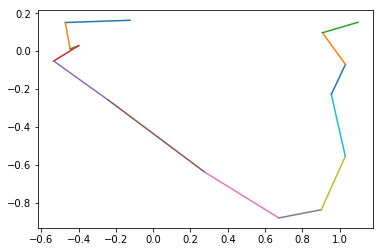

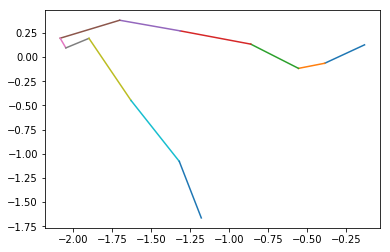

In [16]:
# The sampling function defined in test.py
model_path = "./model/rnn_decoder/{}/{}_best"
data_save_path = "./data/decoder_sampled/{}_{}"

sample_decoder(model_path, data_save_path, 'cat', 2)

**The to use the prediction funtion of classifiers, people just need to change the mode into predict, retore to true. Then just feed the data into the model and run the output of logits.**

## Classifier Accuracy

![title](acc.png)